In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

co2emission = pd.read_csv("D:/Anitha/Graduate/Courses/GradProject/CPSC597/Data/MultipleLinearReg/CO2-Price.csv")
co2emission.head()


,Year,State,CO2,Energy,EnergyPrice
0,1970,Alabama,102.6,1393497,17490
1,1971,Alabama,98.5,1384940,17490
2,1972,Alabama,104.9,1478039,17490
3,1973,Alabama,109.6,1527209,17490
4,1974,Alabama,108.8,1547657,17490


In [2]:
co2emission.isna().any()

Year           False
State          False
CO2            False
Energy         False
EnergyPrice    False
dtype: bool

In [3]:
data = np.random.rand(len(co2emission)) < 0.8
train = co2emission[data]
test = co2emission[~data]
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Energy','EnergyPrice']])
train_y = np.asanyarray(train[['CO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 5.30294502e-05 -1.70679433e-03]]
Intercept:  [42.71286008]


In [4]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Energy','EnergyPrice']])
test_y = np.asanyarray(test[['CO2']])
#predict CO2
test_y_pred = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred , test_y) )
# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % regr.score(test_x, test_y))

Mean absolute error: 13.96
Residual sum of squares (MSE): 390.66
R2-score: 0.97
Explained Variance score: 0.97


In [5]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': test_y_pred.flatten()})
df

,Actual,Predicted
0,104.900000,91.240623
1,111.500000,100.294235
2,95.300000,94.770210
3,104.900000,100.451149
4,113.900000,101.686894
...,...,...
512,61.159496,39.185688
513,59.624835,38.847201
514,63.960496,39.152386
515,62.494167,40.093870


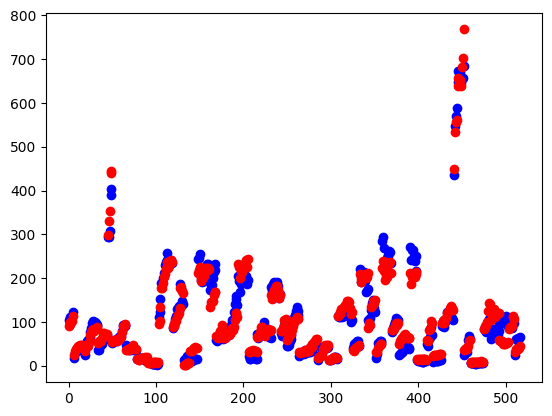

In [9]:
plt.scatter(range(len(test_y)), test_y, color='blue')
plt.scatter(range(len(test_y_pred)), test_y_pred, color='red')
plt.show()